# Modeling the Spread of an Infectious Disease 

This notebook will provide an initial model SIR for you to work on your assignment. Here is some key information: 

### Possible States

•	**Susceptible (S)**: Individuals that have not been infected with the disease, so they are susceptible to be infected within a given probability of disease transmission (i.e., transmission rate) and an average number of contacts per person per time (i.e., contact rate). 

•	**Infected (I)**: Individuals who are infected and can be infectious to other people. There is a probability of recovery and a probability of death associated to leaving this state.

•	**Recovered (R)**: Individuals that were already infected but are now recovered. These individuals cannot be infected anymore, since they developed antibodies. Note: This is not necessarily the case for COVID-19, as the evidence about it is inconclusive at this point, but this is the case for other diseases, and an assumption of this model. 

•	**Deceased (D)**: Individuals that were infected and died as a result of the disease.


### These are the variables that may affect our simulation output:

•	**Contact rate**: average number of contacts per person per day.

•	**Transmission Rate**: probability of disease transmission when a susceptible person gets in contact with an infected person.

•	**Recovery rate**: probability of recovery after being infected.

•	**Mortality rate**: probability of dying after being infected.

•	**Recovery Time**: average number of days that the disease stays in the body.




### Here is the **Mathematical Model** that will help us understand the spread of infectious diseases:

•	**NewInfections**: Infected * Contact rate * (Susceptibles/(Total Population))* Transmission rate

•	**NewRecoveries**: Infected*Recovery rate / Recovery Time.

•	**NewDeaths**: Infected*Mortality Rate / Recovery Time.

•	**Susceptibles**: Susceptibles - NewInfections

•	**Infected**: Infected + NewInfections – (NewRecoveries+NewDeaths)

•	**Recovered**: Recovered + NewRecoveries

•	**Deceased**: Deceased + NewDeaths

## Let's get started
First, we should define the variables that will work as input in our model

In [58]:
ContactRate=2.5
TransmissionRate=0.15
RecoveryRate= 0.95
MortalityRate= 0.05
RecoveryTime= 5
TotalPopulation=1000000

Now, we will create our variables that represent a starting point for our model. We assume that we have one person infected, and since our population is one million, the rest are still susceptible to be infected.



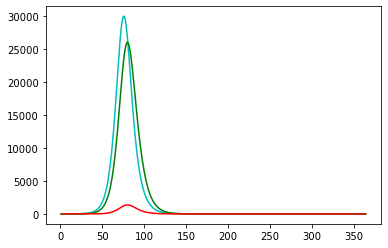

In [61]:
import matplotlib.pyplot as plt
Susceptible = 999999
Infected = 1
Deceased = 0
Recovered = 0
NewDeaths = 0
NewRecoveries = 0
NewInfections = 0
maxInfected = 1


# We will use a loop to iterate through the 365 days of the year. 
# In each iteration, we will compute all the values for our model, and store them in specific arrays, 
# so we can later identify the maximums over the year.
days=list(range(1,365))
listSusceptible=[]
listInfected=[]
listRecovered=[]
listDeaths=[]

for i in range(1,365):
    NewInfections = Infected * ContactRate * (Susceptible/(TotalPopulation))* TransmissionRate
    NewRecoveries =  round(Infected*RecoveryRate / RecoveryTime)
    NewDeaths = round(Infected*MortalityRate / RecoveryTime)
    
    listInfected.append(round(NewInfections))
    listRecovered.append(NewRecoveries)
    listDeaths.append(NewDeaths)
    
    Susceptible = Susceptible - NewInfections
    listSusceptible.append(Susceptible)
    
    Infected += (NewInfections-(NewRecoveries+NewDeaths))
    Recovered += NewRecoveries
    Deceased += NewDeaths
    
    if maxInfected<Infected:
        maxInfected=round(Infected)
    
plt.plot(days,listInfected, 'c-')
plt.plot(days,listRecovered, 'g-')
plt.plot(days,listDeaths, 'r-')
#plt.plot(days,listSusceptible, 'k-')


### Activity
Explain the simualtion to each other, and identify how this meets (or not) the requirements of the SIR simulation.

Individually, present the following indicators, and discuss the implications of: (1) having a higher or lower contact rate (e.g., with or without confinement),  (2) increasing or decreasing the recovery rate (e.g., finding new treatments or with limited resources to treat those who are infected).

•	Total number of people who got infected 

•	Total number of people who recovered 

•	Total number of unaffected people

•	Total number of deaths

•	Max number of people infected in a given date

•	Max number of infections in one day

•	Max number of recovered people in one day

•	Max number of deaths in one day


In [62]:
# This is the solution for the indicators that we are asking students to compute. 
# They will need to understand the simulation in order to compute these accurately
# Students will need to run the simulation using different values for the 
# variables ContactRate, RecoveryRate, and MortalityRate to make conclusions about the effect of different measures

print('Total Infections')
print(sum(listInfected))
print('Total Recovered')
print(sum(listRecovered))
print('Total Unaffected')
print(TotalPopulation-sum(listInfected))
print('Total Deaths')
print(sum(listDeaths))

print('Max number of people infected in a given date')
print(maxInfected)
print('Max number of infections in one day')
print(max(listInfected))
print('Max number of recovered people in one day')
print(max(listRecovered))
print('Max number of deaths in one day')
print(max(listDeaths))


Total Infections
769740
Total Recovered
731298
Total Unaffected
230260
Total Deaths
38481
Max number of people infected in a given date
137228
Max number of infections in one day
30025
Max number of recovered people in one day
26073
Max number of deaths in one day
1372
